# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [1]:
# CVlib
!pip install cvlib

  Created wheel for cvlib: filename=cvlib-0.2.5-py3-none-any.whl size=10044210 sha256=f39dd64f413aa6c7f6d45ce091c8610a4f6c2b41617107372e949e0bb37dcb20
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\ba\f7\c8\79042f12b1a3bcc676c4bda8fea4ef308c871c3ae581e94dad
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12078 sha256=832b795369fac876f473cfe05fe1d6a919230c9b35389e2111095475a76803ac
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\f0\fd\1f\3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25856 sha256=4b7522292e73abe563f99dd776d841c5381618c5d752478a65a005dc81389e06
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\fc\9c\6d\1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built cvlib progressbar imutils


In [2]:
# tensorflow
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=4655ea72ba4042eb21ba2c799b8d878dbfcb91f0f62154d4063435f2b3727d1e
  Stored in directory: c:\users\sm-pc\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor


In [3]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 :  RGB color space

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

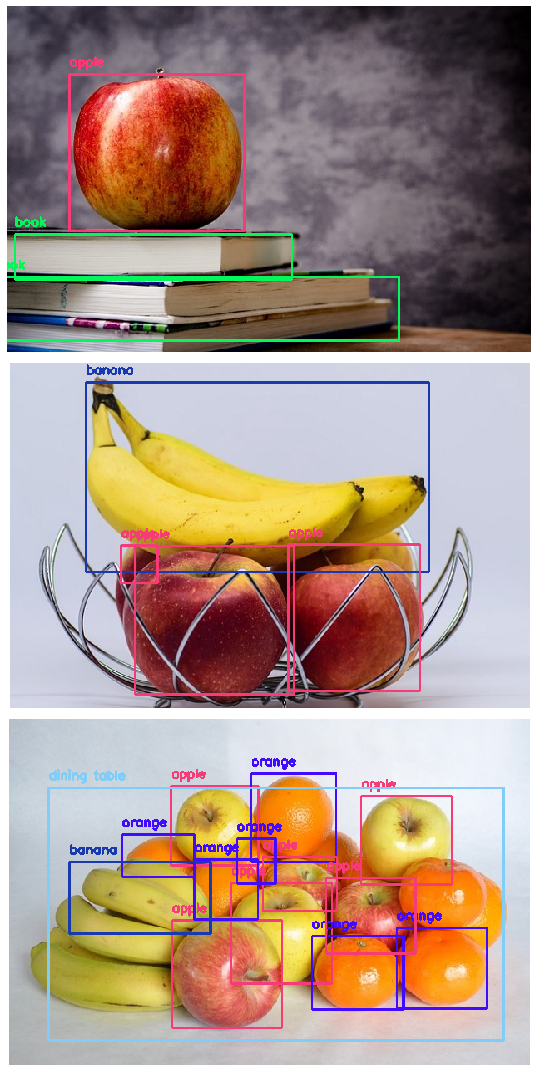

In [4]:
fig = plt.figure(figsize=(15,15))
for i in range(1, 4):
    image_path = './image/image'+ str(i) +'.jpeg'
    im = cv2.imread(image_path)
    
    bbox, label, conf = cv.detect_common_objects(im)
    
    output_image = draw_bbox(im, bbox, label, conf)
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

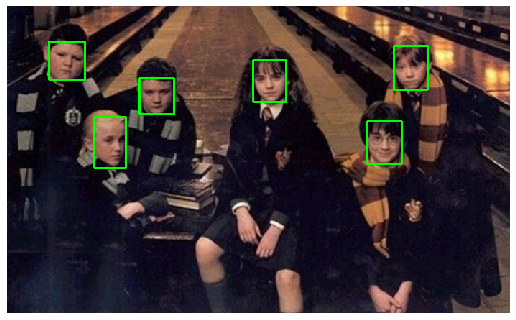

In [5]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

[INFO] Initializing gender detection model ..


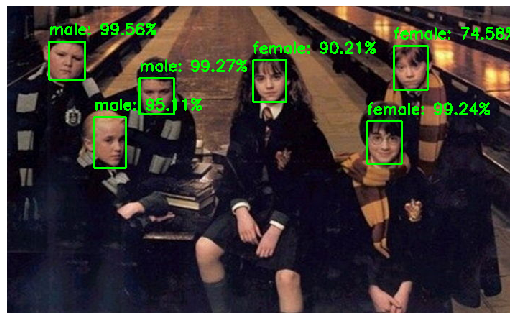

In [6]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    (label, confidence) = cv.detect_gender(face_crop)

    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [7]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    frame = cv2.flip(frame, 1)
    cv2.imshow("Real-time video", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 1 ) 번

In [8]:
# 직접 코드 작성

webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply object detection (물체 검출)
    bbox, label, conf = cv.detect_common_objects(frame)

    print(bbox, label, conf)

    # draw bounding box over detected objects (검출된 물체 가장자리에 바운딩 박스 그리기)
    out = draw_bbox(frame, bbox, label, conf, write_conf=True)

    # display output
    cv2.imshow("Real-time object detection", out)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

[[111, 142, 648, 478]] ['person'] [0.9997357130050659]
[[106, 144, 646, 472]] ['person'] [0.9996904730796814]
[[104, 139, 651, 476]] ['person'] [0.9997355341911316]
[[111, 140, 646, 476]] ['person'] [0.9996917843818665]
[[104, 137, 650, 478]] ['person'] [0.9994393587112427]
[[108, 141, 644, 471]] ['person'] [0.9996308088302612]
[[114, 140, 641, 475]] ['person'] [0.9997000098228455]
[[109, 141, 650, 475]] ['person'] [0.9996878504753113]
[[109, 146, 647, 474]] ['person'] [0.9997172951698303]
[[109, 138, 641, 473], [473, 419, 524, 478]] ['person', 'cell phone'] [0.9996185302734375, 0.5074501633644104]
[[107, 143, 645, 475]] ['person'] [0.9997363686561584]
[[103, 149, 644, 470]] ['person'] [0.9992147088050842]
[[102, 146, 637, 474]] ['person'] [0.9993657469749451]
[[64, 160, 579, 467]] ['person'] [0.9978910088539124]
[[58, 155, 586, 470]] ['person'] [0.9981995224952698]
[[60, 157, 589, 470]] ['person'] [0.9980970025062561]
[[75, 157, 573, 468]] ['person'] [0.9978678822517395]
[[66, 151, 57